Data Visualization of Bird Strikes by Aircraft (2000-2011)

Objective: 

Bird strikes, which occur when birds collide with aircraft during flight, takeoff, or landing, pose a serious risk to aviation safety. 
This analysis aims to address key research questions regarding bird strikes, identify the factors contributing to their increase, 
and propose strategies to mitigate these incidents.

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import warnings 
warnings.filterwarnings("ignore")

Importing Database

In [3]:
os.chdir("D://Data Analytics")

In [4]:
df_1=pd.read_csv('Bird Strikes data.csv')

In [5]:
df_1.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/2000 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/2001 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/2001 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/2002 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/2003 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [6]:
df.columns

NameError: name 'df' is not defined

In [ ]:
df_1.tail()

In [ ]:
R=df_1.shape
print(f"Number of rows are {R[0]}\nNumber of columns are {R[1]}") #.format(R[0],R[1]))

In [ ]:
df_1.columns

In [ ]:
df_1.drop(columns = ["Aircraft: Make/Model","Aircraft: Number of engines?","Remarks"],axis=1,inplace=True)

In [ ]:
# checking the null values 
df_1.isnull().sum()

Here are the some columns which are having almost 75% null values present in it so we remove that columns which is not needed for our analysis

In [ ]:
df_1.drop(columns = ["Conditions: Precipitation"],axis=1,inplace=True)

In [ ]:
df_1["Effect: Impact to flight"].unique()

In [ ]:
df_1["Effect: Impact to flight"]= df_1["Effect: Impact to flight"].replace(np.nan,"No Impact")

In [ ]:
df_1.isnull().sum()    #to check the null values present in the dataset.

In [ ]:
df_1.shape

In [ ]:
df_1["Effect: Impact to flight"].unique()    #NAN value has been replaced with "No Impact".

In [ ]:
df_1 = df_1.dropna(axis = 0, how = "any")     #to remove all the null values from the dataset.

In [ ]:
# changing the data type of flight date to date

df_1["FlightDate"] = pd.to_datetime(df_1["FlightDate"])

In [ ]:
df_1.info()

Case Studies Data Visualization And Analysis

In [7]:
df_1.describe(include="object")

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,...,When: Phase of flight,Conditions: Precipitation,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Is Aircraft Large?
count,25429,25429,25429,25558,25429,2078,25429,25558,25291,25429,...,25429,2015,20787,25429,25558,25558,25429,25558,25429,25429
unique,1,1109,2,351,4,4,4225,2,5,292,...,7,7,18186,3,3,348,2,803,257,2
top,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,B-737-700,1,Precautionary Landing,10/28/2010 0:00,No damage,2,SOUTHWEST AIRLINES,...,Approach,Rain,NO DMG.,Small,No Cloud,Unknown bird - small,N,0,0,No
freq,25429,803,20556,2488,20790,1121,28,23081,23025,4628,...,10382,1353,740,17412,12642,10505,14567,24330,9843,17027


In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [9]:
df_1.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [10]:
df_1.shape

(25558, 26)

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [12]:
df_1.describe(include='object')

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,...,When: Phase of flight,Conditions: Precipitation,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Is Aircraft Large?
count,25429,25429,25429,25558,25429,2078,25429,25558,25291,25429,...,25429,2015,20787,25429,25558,25558,25429,25558,25429,25429
unique,1,1109,2,351,4,4,4225,2,5,292,...,7,7,18186,3,3,348,2,803,257,2
top,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,B-737-700,1,Precautionary Landing,10/28/2010 0:00,No damage,2,SOUTHWEST AIRLINES,...,Approach,Rain,NO DMG.,Small,No Cloud,Unknown bird - small,N,0,0,No
freq,25429,803,20556,2488,20790,1121,28,23081,23025,4628,...,10382,1353,740,17412,12642,10505,14567,24330,9843,17027


Outliner detection for Altitude column

In [30]:
#df_1["Feet above ground"] = df_1["Feet above ground"].str.replace(',', '').astype(int)
#df_1["Feet above ground"] = df_1["Feet above ground"].str.replace(',', '', regex=False).fillna('0').astype(int) #to replace null values with 0.
df_1["Feet above ground"] = df_1["Feet above ground"].astype(int)

<Axes: xlabel='Feet above ground'>

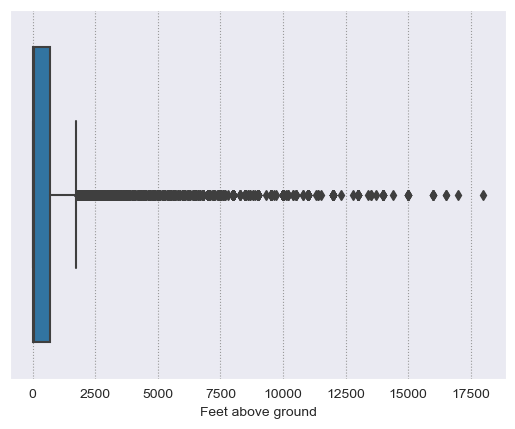

In [31]:
sns.boxplot(data = df_1, x= "Feet above ground")

Here it is that we cannot remove the outliers becuase if we remove that like removing 12000- 18000 altitude values it will affect our analysis

Visuals Depicting the number of bird strikes

In [32]:
df_1.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [33]:
birds_trend = df_1.groupby(["FlightDate","Altitude bin"],as_index=False).agg({"Wildlife: Number Struck Actual":"sum"})

In [34]:
birds_trend

,FlightDate,Altitude bin,Wildlife: Number Struck Actual
0,1/1/2001 0:00,< 1000 ft,1
1,1/1/2002 0:00,< 1000 ft,8
2,1/1/2003 0:00,< 1000 ft,50
3,1/1/2003 0:00,> 1000 ft,1
4,1/1/2004 0:00,< 1000 ft,8
...,...,...,...
6519,9/9/2009 0:00,> 1000 ft,10
6520,9/9/2010 0:00,< 1000 ft,30
6521,9/9/2010 0:00,> 1000 ft,8
6522,9/9/2011 0:00,< 1000 ft,32


we are having lots of trend data as it is from 2000 to 2012 that makes analysis also tough so we divided the trend into two parts

In [35]:
birds_trend_1 = birds_trend[(birds_trend["FlightDate"] >= "2000") & (birds_trend["FlightDate"] <= "2006")]

In [36]:
birds_trend_2 =  birds_trend[(birds_trend["FlightDate"] > "2006") & (birds_trend["FlightDate"] <= "2012")]

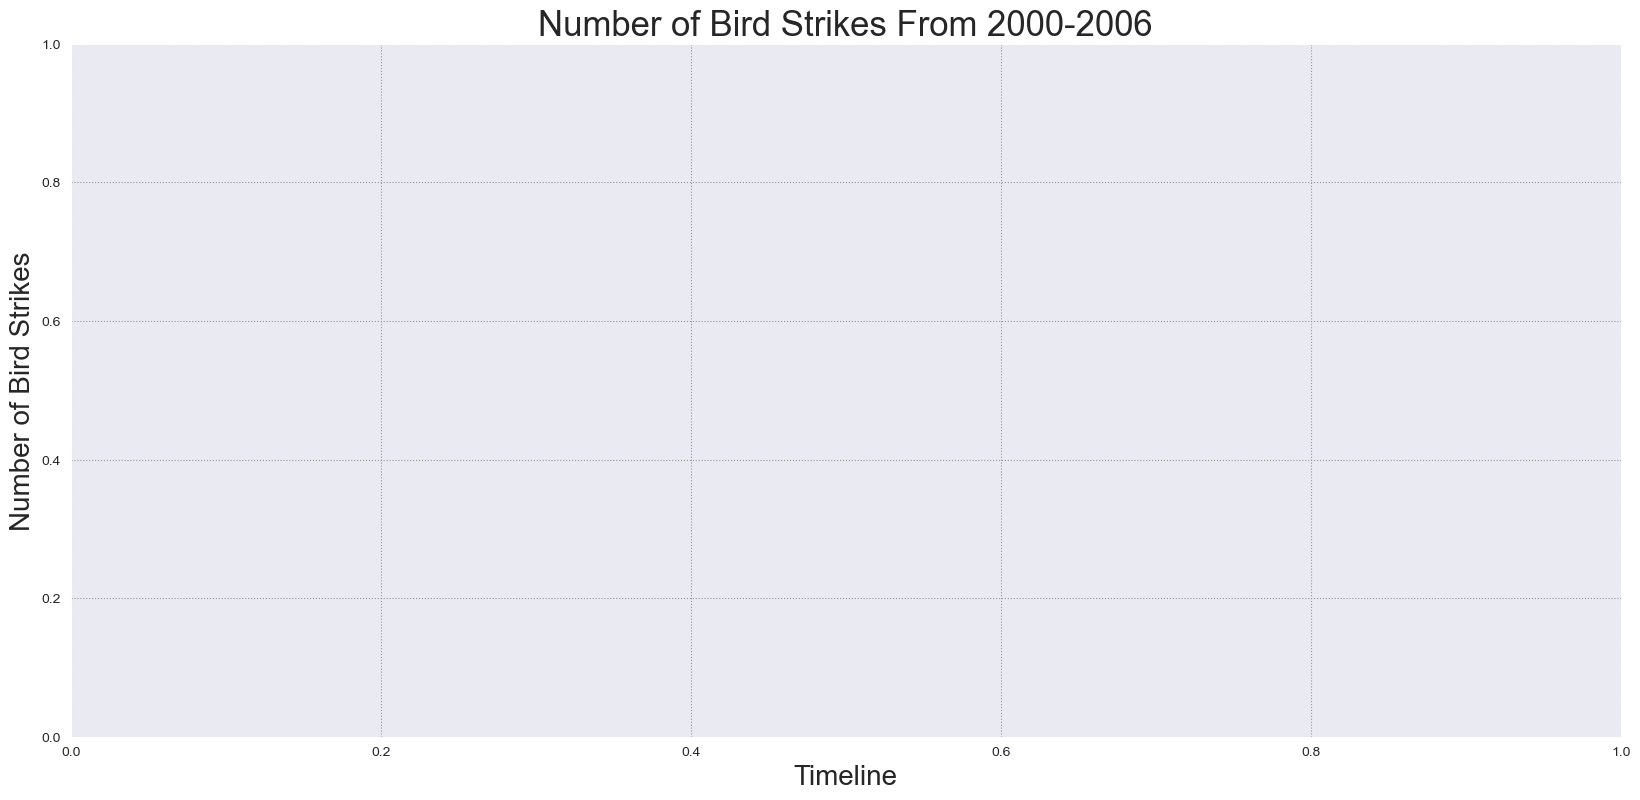

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(20,9))
sns.lineplot(data=birds_trend_1, x="FlightDate", y="Wildlife: Number Struck Actual", hue="Altitude bin", palette="CMRmap")
plt.xlabel("Timeline", fontsize=20)
plt.ylabel("Number of Bird Strikes", fontsize=20)
plt.title("Number of Bird Strikes From 2000-2006", fontsize=25)
plt.show()

So here we can analyze that if the aircraft altitude is < 1000 then the birds strikes occured more as compare to > 1000 altitude their is only one spike around 2000-2001 where if the altitude > 1000 then the strike occured

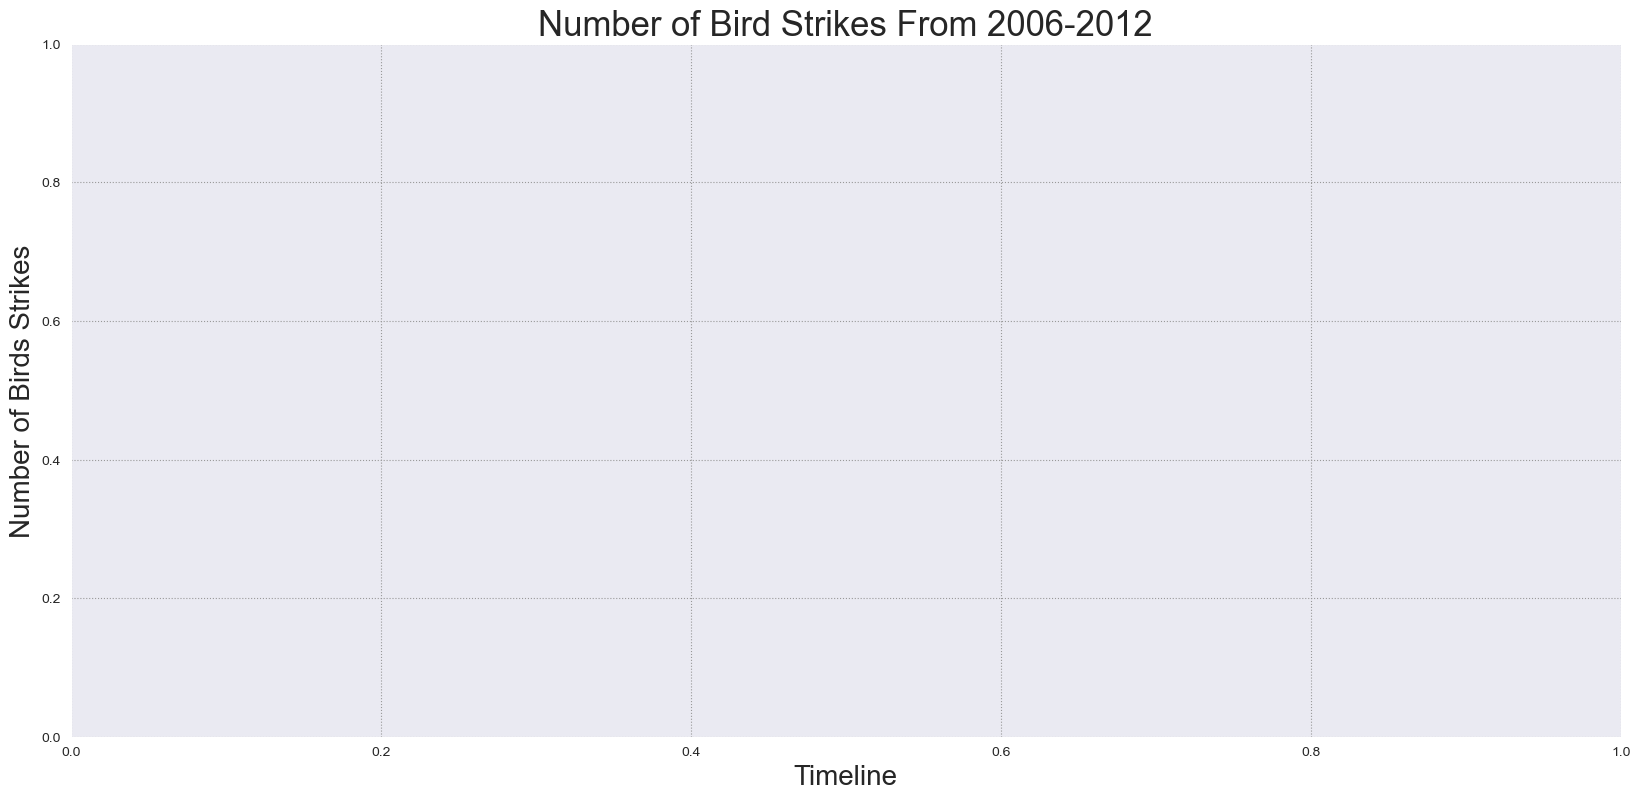

In [38]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(20,9))
sns.lineplot(data = birds_trend_2, x="FlightDate",y= "Wildlife: Number Struck Actual",hue="Altitude bin",palette="CMRmap")
plt.xlabel("Timeline",fontsize=20)
plt.ylabel("Number of Birds Strikes",fontsize=20)
plt.title("Number of Bird Strikes From 2006-2012",fontsize =25)
plt.show()

Same here for the date between 2006 to 2012 but one thing we can see the birds strikes having altitude < 1000 that their is a pattern in the trend line as starting of the year is having constant line and at the middle of the year their is constant increase in the birds strike and them decrease again we can see in the each year comparison here so there might be a chance that climatic changes would be the reason for the same at the end of year

Hypothesis- Altitude effect on Bird Strikes
Hypothesis - Birds strike are most likely occur during the take-offs,initial climb, approach and lanading phases that means lesser altitude higher bird strikes and higher altitude lesser bird strikes

In [39]:
df_1.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [40]:
df_1.rename(columns = {"Feet above ground":"Altitude"},inplace=True)

In [41]:
data_3 = df_1[(df_1["Wildlife: Number Struck Actual"] > 10)]

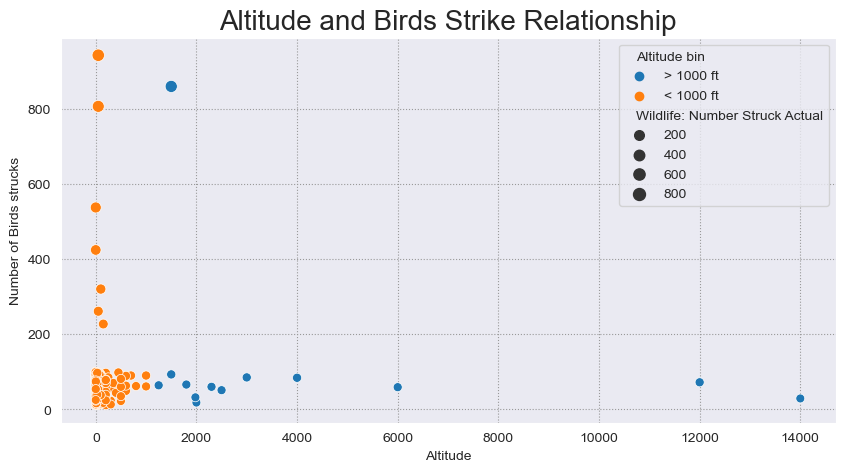

In [42]:
plt.figure(figsize = (10,5))
sizes = df_1["Wildlife: Number Struck Actual"]
sns.scatterplot(data = data_3,x="Altitude",y="Wildlife: Number Struck Actual",hue="Altitude bin",size= sizes,sizes=(40,80))
plt.title("Altitude and Birds Strike Relationship",fontsize=20)
plt.ylabel("Number of Birds strucks")
plt.show()

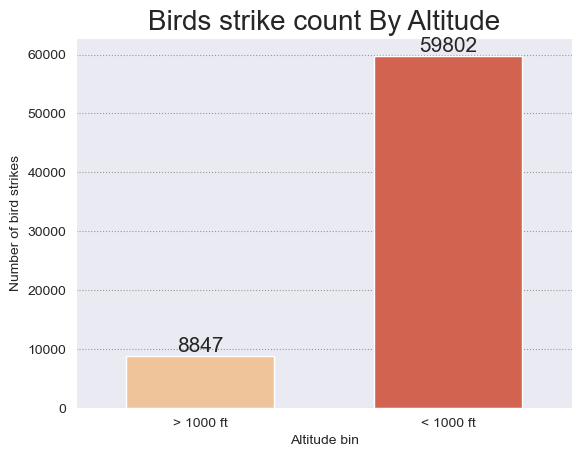

In [43]:
ax_1= sns.barplot(data= df_1,x="Altitude bin",y="Wildlife: Number Struck Actual",estimator="sum",ci=None,palette="OrRd",width=0.6)
for x in ax_1.containers:
    ax_1.bar_label(x,fontsize=15)
plt.title("Birds strike count By Altitude",fontsize=20)
plt.ylabel("Number of bird strikes")
plt.show()

As per the first graph we can see the distribution of data as many data is clustred where the altitude is less than 1000 as altitude is increasing less data is distributed is there so increasing altitude having negative impact on the birds strike and second bar chart shows the actual number of birds strike for when altitude < 1000 is 58538 and when altitude > 1000 is 8710 so our hypothesis is correct that mostly birds strike occur at the low altitude when aircraft is in take-off,initial climb, approach and landing phases

In [44]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


Yearly Analysis for the Bird Strike in US

In [45]:
df_1["Year"] = pd.DatetimeIndex(df_1["FlightDate"]).year
df_1["Year"].unique()

array([2000., 2001., 2002., 2003., 2006.,   nan, 2004., 2005., 2007.,
       2008., 2009., 2010., 2011.])

In [46]:
new_data = df_1.groupby(["Year"],as_index=False).agg({"Wildlife: Number Struck Actual":"sum"})

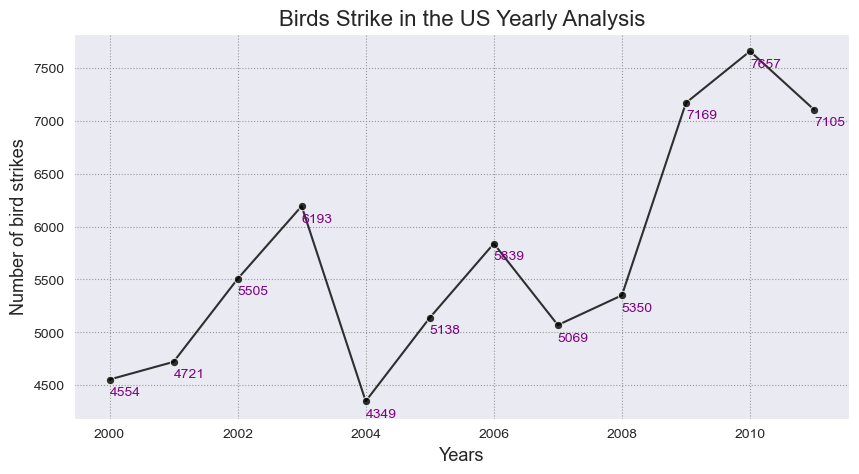

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(data=new_data,x="Year",y="Wildlife: Number Struck Actual",ci=30,marker="o",color="k",alpha=0.8)
plt.ylabel("Number of bird strikes",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.title("Birds Strike in the US Yearly Analysis",fontsize=16)
# label points on the plot
for x, y in zip(new_data["Year"], new_data["Wildlife: Number Struck Actual"]):
 plt.text(x = x, 
 y = y-150,
 s = "{:.0f}".format(y), 
 color = "purple") 

This whole data is taken from US so that's why take the whole dataset

As per the above yearly trend line as the years increasing the number of bird strikes are also increased where highest recorded in 2010 with 7545 incidents and lowest in the 2004 with 4321 incidents however their is dip in the incidents from 2010 to 2011 but not a big impact.The reason behind the strikes increasing as the time increases is might be the increasing number of aircrafts as demand is increasing because of the population


Airlines Bird Strike Analysis

In [48]:
df_1.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $', 'Altitude',
       'Number of people injured', 'Is Aircraft Large?', 'Year'],
      dtype='object')

In [49]:
data_2 = df_1.groupby(["Aircraft: Airline/Operator"],as_index=False).agg({"Wildlife: Number Struck Actual":"sum"}).sort_values(by="Wildlife: Number Struck Actual",
ascending=False).head(10)                                                                                                                        

In [50]:
data_2= data_2.reset_index(drop=True)
data_2

,Aircraft: Airline/Operator,Wildlife: Number Struck Actual
0,BUSINESS,9331
1,SOUTHWEST AIRLINES,9208
2,AMERICAN AIRLINES,6107
3,DELTA AIR LINES,3911
4,US AIRWAYS*,3377
5,AMERICAN EAGLE AIRLINES,2763
6,COMAIR AIRLINES,1986
7,UNITED AIRLINES,1930
8,SKYWEST AIRLINES,1920
9,JETBLUE AIRWAYS,1562


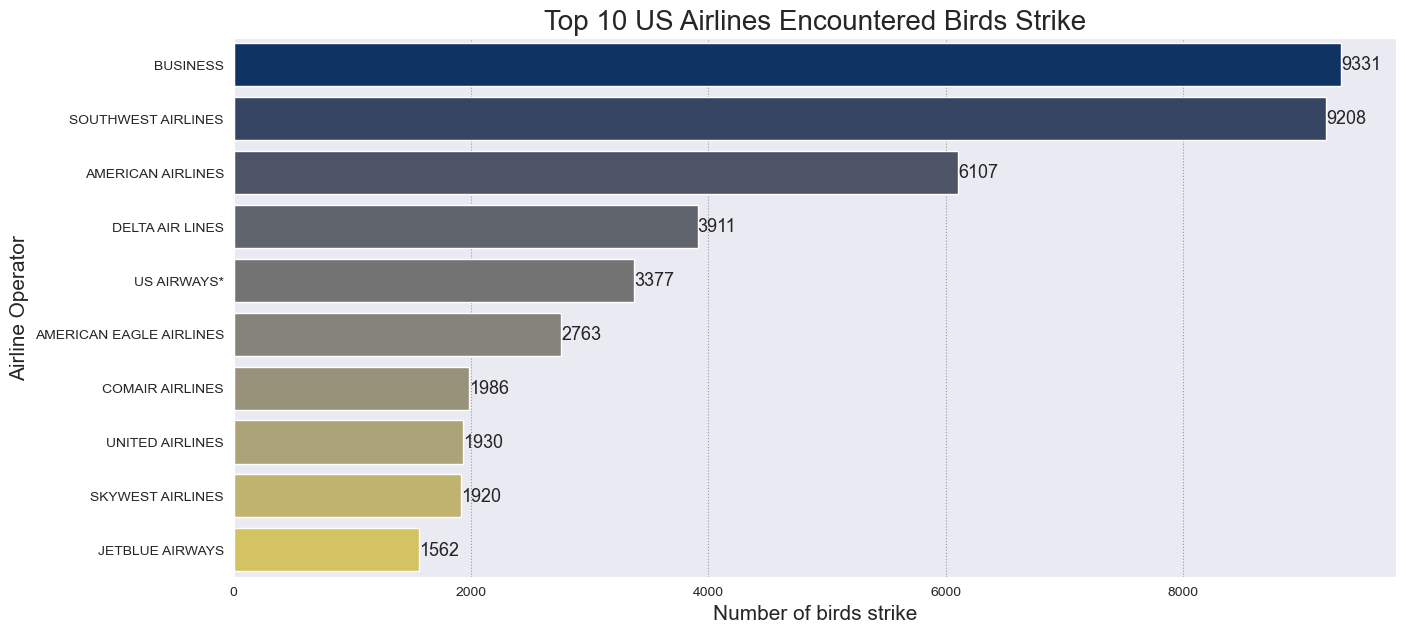

In [51]:
plt.figure(figsize=(15,7))
ax_1 =  sns.barplot(data=data_2,y="Aircraft: Airline/Operator",x="Wildlife: Number Struck Actual",estimator="sum",palette="cividis")
for x in ax_1.containers:
    ax_1.bar_label(x,fontsize=13)
plt.ylabel("Airline Operator",fontsize=15)
plt.xlabel("Number of birds strike",fontsize=15)
plt.title("Top 10 US Airlines Encountered Birds Strike",fontsize=20)
plt.show()

Birds Strike Distribution

<Figure size 1500x500 with 0 Axes>

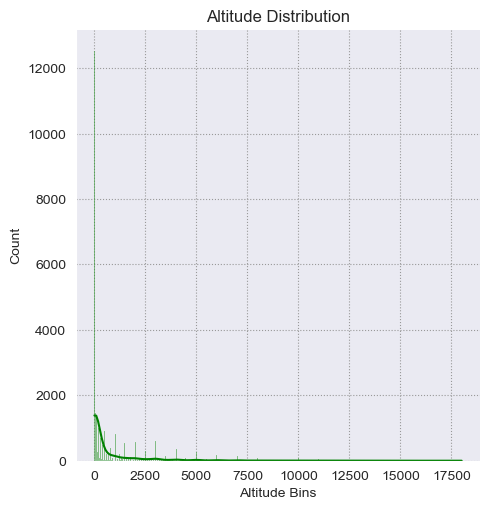

In [52]:
plt.figure(figsize=(15,5))

sns.displot(data=df_1,x="Altitude",color="g",kde=True)
plt.xlabel("Altitude Bins")
plt.title("Altitude Distribution")
plt.show()

Here we can see after after 5000 altitude the density of altitude is very low so for more clarified distribution we take only altitude bins upto 5000

In [53]:
data_4 = df_1[(df_1["Altitude"] <= 5000) & (df_1["Altitude"]>0)]

<Figure size 2000x500 with 0 Axes>

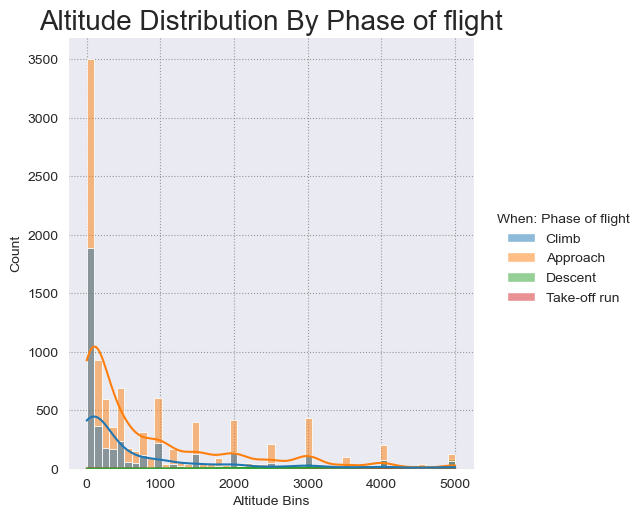

In [54]:
plt.figure(figsize=(20,5))
sns.displot(data=data_4,x="Altitude",color="g",kde=True,hue="When: Phase of flight")
plt.xlabel("Altitude Bins")
plt.title("Altitude Distribution By Phase of flight",fontsize=20)
plt.show()

Here we can see two things first greater number of values for altitude < 1000 so birds striking most commonly happening in < 1000 altitude and second when the flight is approaching it encountered more birds strike and on the second when flight is about in its Climbing phase so that truly proves the hypothesis as well

In [55]:
df_1.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $', 'Altitude',
       'Number of people injured', 'Is Aircraft Large?', 'Year'],
      dtype='object')

In [56]:
new_df = df_1.groupby(["Airport: Name"],as_index=False).agg({"Wildlife: Number Struck Actual":"sum"}).sort_values(by="Wildlife: Number Struck Actual",
ascending=False)

In [57]:
new_df = new_df.head(50)
new_df.reset_index(drop=True,inplace=True)
new_df.rename(columns = {"Wildlife: Number Struck Actual":"Struck Numbers"},inplace=True)
new_df

,Airport: Name,Struck Numbers
0,DALLAS/FORT WORTH INTL ARPT,2933
1,SACRAMENTO INTL,1856
2,LAGUARDIA NY,1579
3,PHILADELPHIA INTL,1396
4,SALT LAKE CITY INTL,1376
5,SAN FRANCISCO INTL ARPT,1210
6,JOHN F KENNEDY INTL,1207
7,SEATTLE-TACOMA INTL,1181
8,NORFOLK INTL,1119
9,BALTIMORE WASH INTL,1027


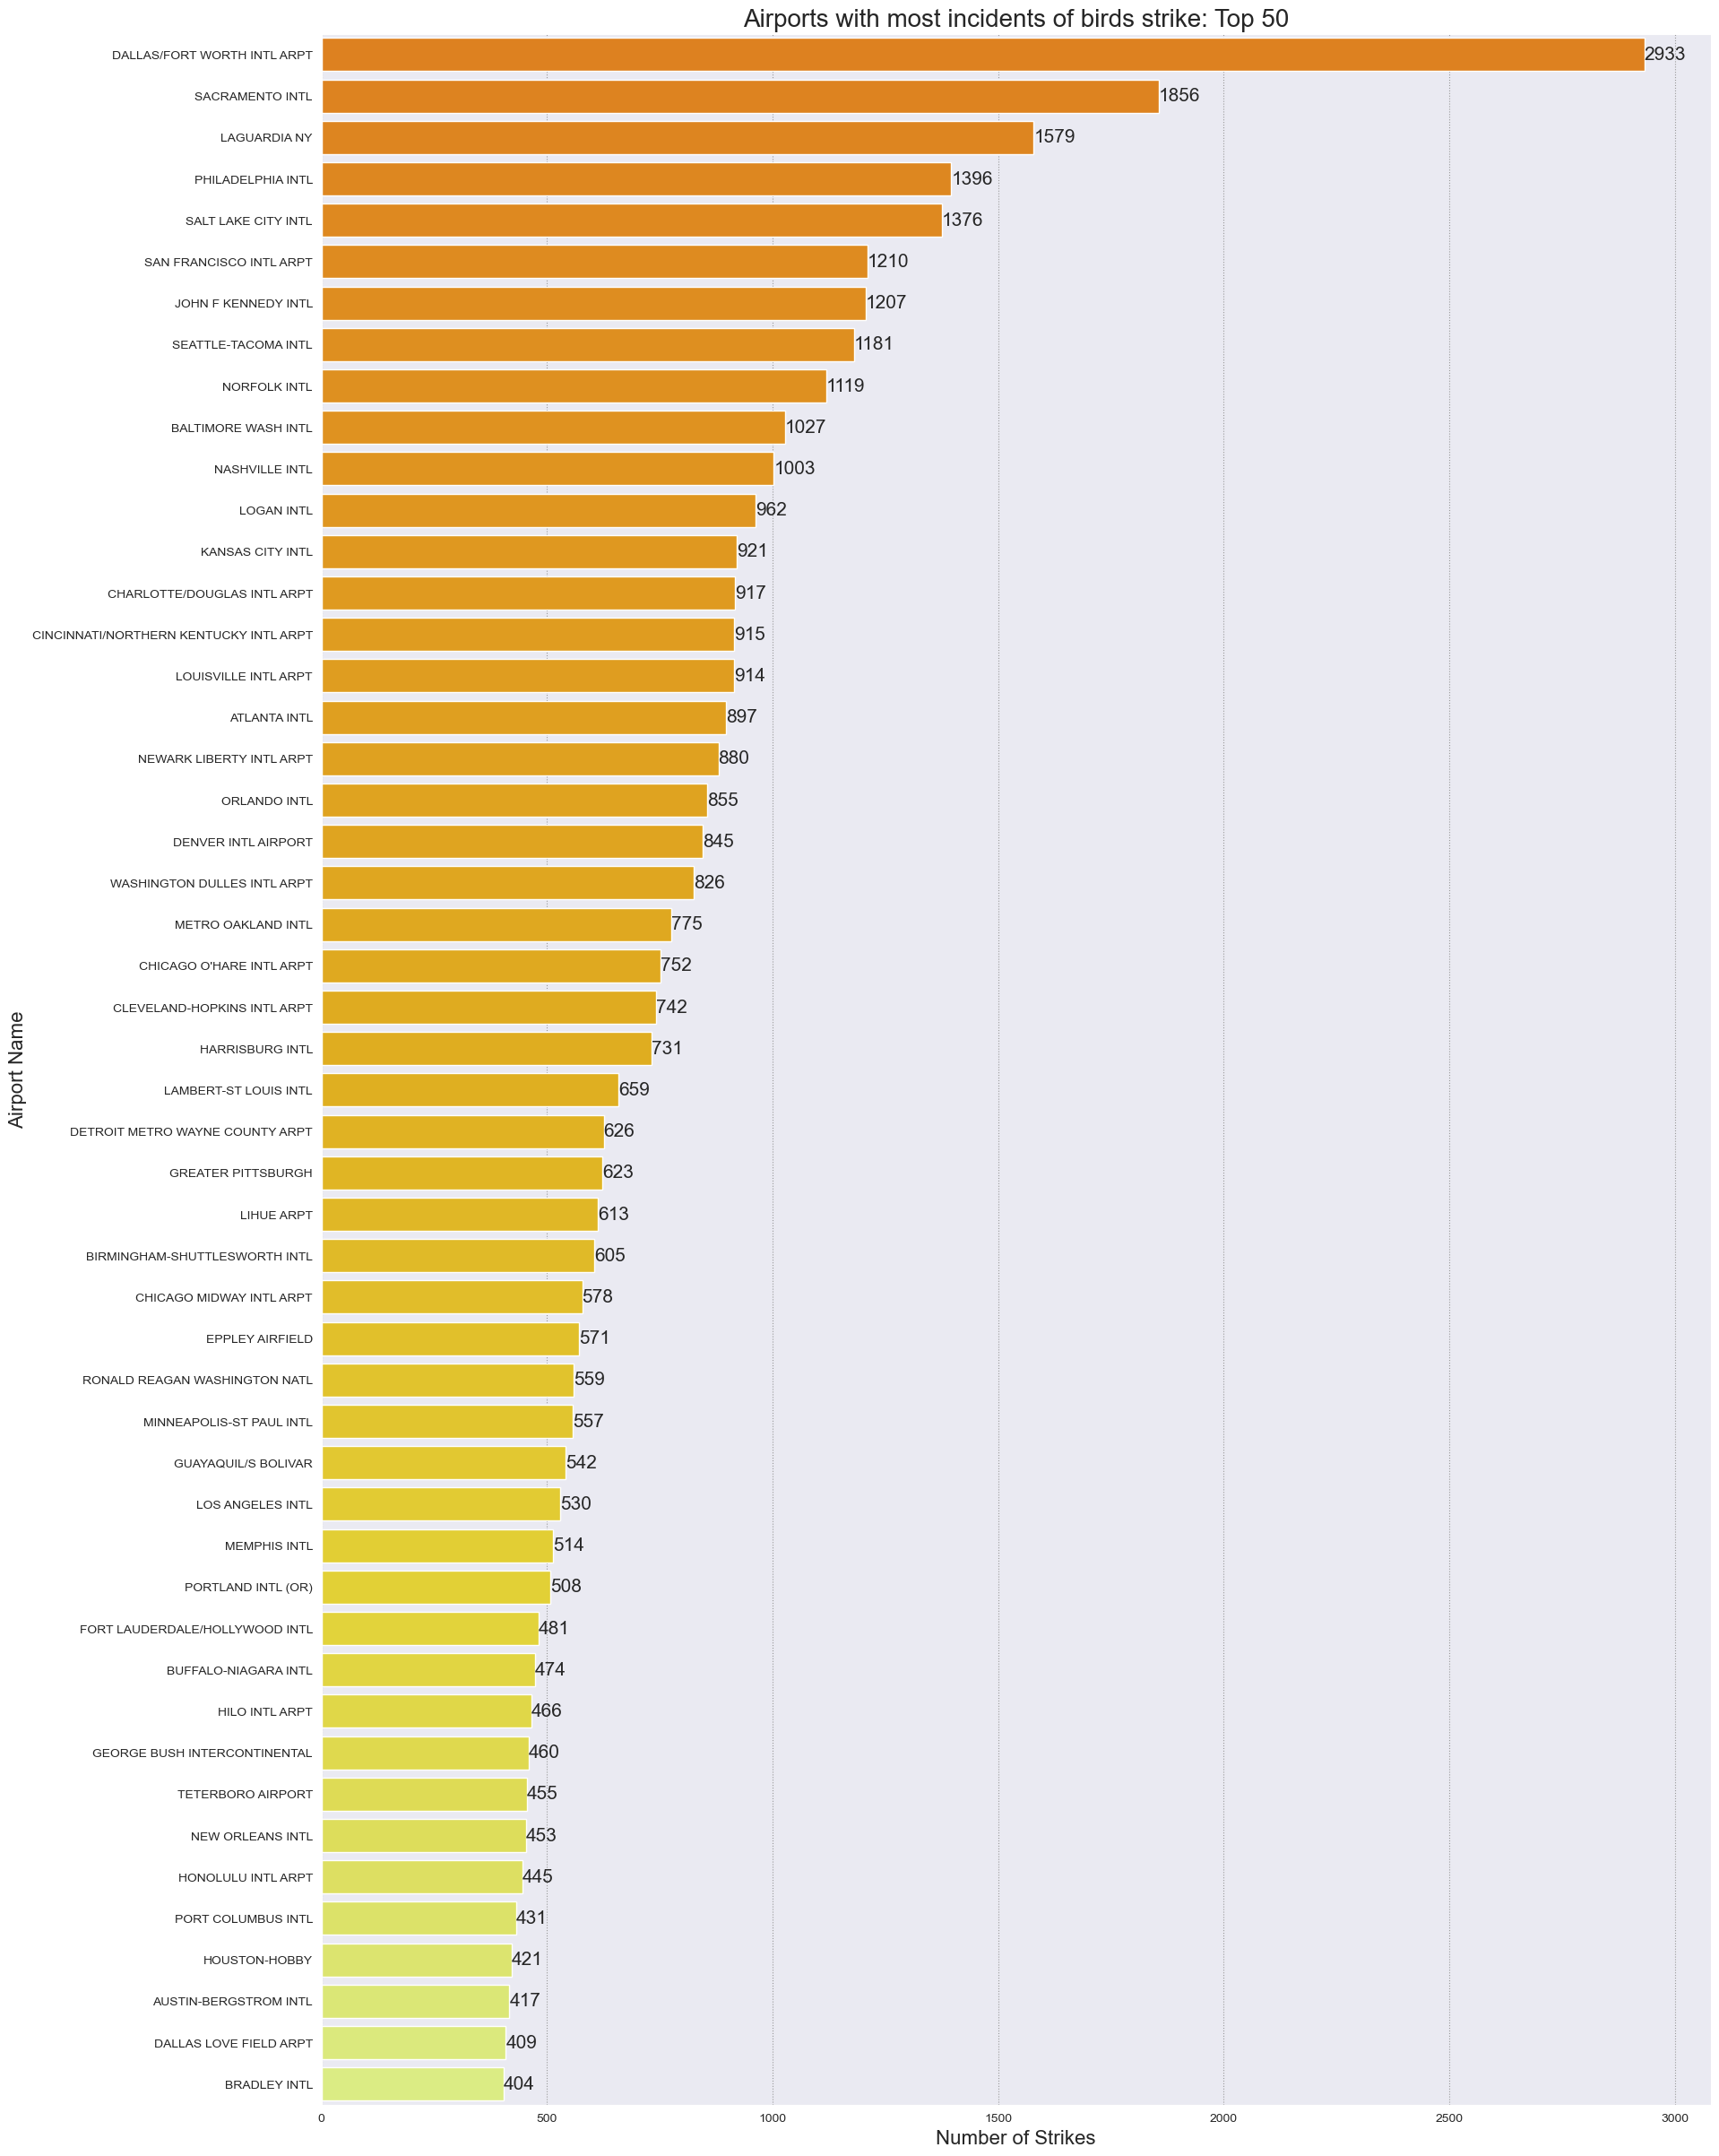

In [58]:
plt.figure(figsize=(20,30))
palette = sns.color_palette("Wistia",n_colors=50)
palette.reverse()
ax_1=sns.barplot(data=new_df,x="Struck Numbers",y="Airport: Name",estimator="sum",palette=palette)
for x in ax_1.containers:
    ax_1.bar_label(x,fontsize=15)
plt.ylabel("Airport Name",fontsize=16)
plt.xlabel("Number of Strikes",fontsize=16)
plt.title("Airports with most incidents of birds strike: Top 50",fontsize=20)
plt.show()

Yearly Cost Incurred due to birds strike

In [59]:
df_1.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $', 'Altitude',
       'Number of people injured', 'Is Aircraft Large?', 'Year'],
      dtype='object')

In [60]:
new_df_2 = df_1.groupby(["Year","Is Aircraft Large?"],as_index=False).agg({"Cost: Total $":"sum"})

In [118]:
df_1["Cost: Total $"] = df_1["Cost: Total $"].str.replace(',', '').astype(int)
#df_1["Cost: Total $"]= df_1["Cost: Total $"].astype(int)

In [119]:
pd.to_numeric(new_df_2['Cost: Total $'], errors='coerce')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: Cost: Total $, dtype: float64

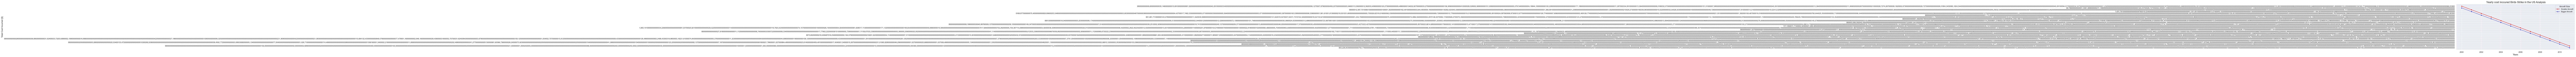

In [123]:
sns.set_theme()
plt.figure(figsize=(13,5))
sns.lineplot(data=new_df_2,x="Year",y="Cost: Total $",ci=None,marker="o",palette=["red","blue"],hue="Is Aircraft Large?",style="Is Aircraft Large?",legend
=False)
plt.ylabel("Total Cost Incurred ($)",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.title(" Yearly cost inccured Birds Strike in the US Analysis",fontsize=16)
plt.legend(title='Aircraft Size', loc='upper right', labels=['Smaller Aircraft', 'Bigger Aircraft'])

In [124]:
# label points on the plot
for x, y in zip(new_df_2["Year"], new_df_2["Cost: Total $"]):
    plt.text(x = x, y = y-150, s = "{:.0f}".format(y), color = "black")

TypeError: unsupported operand type(s) for -: 'str' and 'int'

From the above line chart we can analyse that cost incurred for the incidents during 2001 is high for smaller aircraft ( 
3249890) as smaller aircrafts might have size issues or less jet engine which make the difficult for the aircraft to handle the strike that increases the cost for them but as time progress in the recent year 2011 aircraft larger in size have incurred more cost ( 
 3744722) that is big difference comes which is concerning for the airline operators which we suggest to find out the root cause for the increase in cost. As also one thing last three years from 2009 to 2011 the cost incurred on larger aircraft is increasing constantly

When do birds strike occured the most during phase of flight?

In [ ]:
df_1.columns

In [ ]:
flight_phase_data = df_1.groupby("When: Phase of flight")["Wildlife: Number Struck Actual"].sum() 
flight_phase_data

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x=flight_phase_data,labels= flight_phase_data.index,autopct="%.2f",colors=[
        # matplotlib named colors 
        'tomato', 'cornflowerblue', 'gold', 'orchid', 'green', 
        "#77BFE2","brown"],textprops={"fontsize":14,"color":"black"})
plt.title("Birds Strike During Different Phase of Flight",fontsize=20)
plt.show()

From the above pie chart we can rertieve that most of the incidents occured at Approaching Phase of flight 36% approx and then Landding Roll 21% and then climbing and take off run phase contributing to 20% each.Approach phase is between the phase when flight is under 5000 Feet AGL and flight is landed in run way so yes birds and other flying species is at this phase so higher possibility of birds striking occur at this stage But landing roll is also contributing 21% that is phase between when plane is landed and exits the run way here we can make the precautions to clean the area for run way for flight to land easily because it is on ground phase so air controller can take some actions here

In [ ]:
df_1.columns

Average Altitude At the time of strike for each phase of flight

In [ ]:
new_df_5 = df_1.groupby(["When: Phase of flight"],as_index=False).agg({"Altitude":"mean"})
new_df_5

<Axes: xlabel='When: Phase of flight', ylabel='Altitude'>

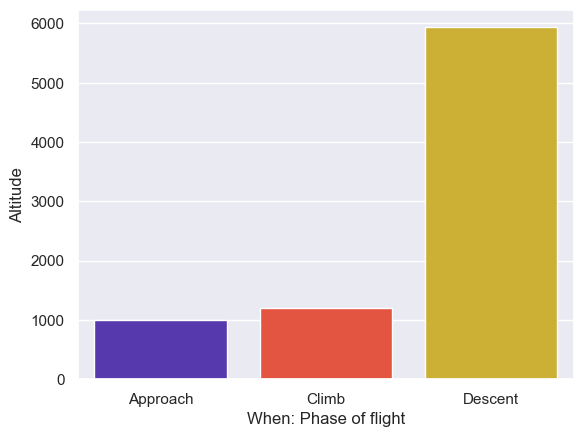

In [125]:
sns.barplot(data = new_df_5,x="When: Phase of flight",y="Altitude",palette="CMRmap")

As Landing Roll, Parked,Take-off run and taxi phase are at the ground level so no altitude would be there so we remove these 3

In [126]:
new_df_5 = new_df_5[:3]
new_df_5

,When: Phase of flight,Altitude
0,Approach,1001.733385
1,Climb,1199.654324
2,Descent,5933.960052


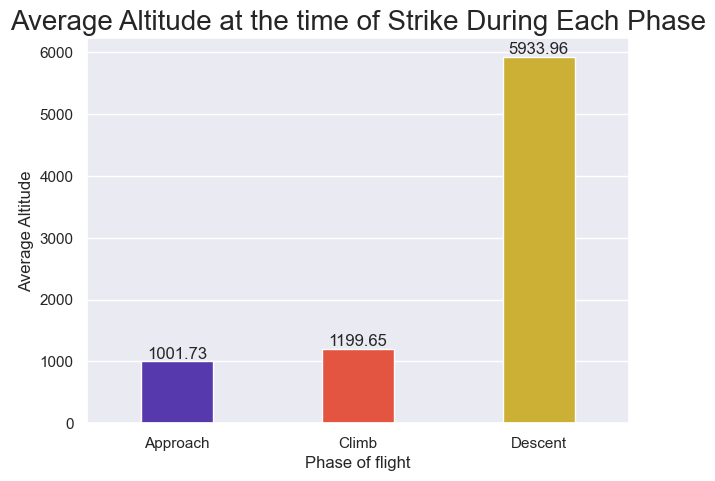

In [127]:
plt.figure(figsize= (7,5))
ax_1= sns.barplot(data = new_df_5,x="When: Phase of flight",y="Altitude",palette="CMRmap",width=0.4)
for x in ax_1.containers:
    ax_1.bar_label(x)
plt.xlabel("Phase of flight")
plt.ylabel("Average Altitude")
plt.title("Average Altitude at the time of Strike During Each Phase",fontsize=20)
plt.show()

So from the above graph we can analyse that at the time of approaching phase where the most birds strike occured the average altitude is 1000 Approx and during climibing phase 1200 approx and for the descent phase no use of that as around less incidents of birds strike occured during that phase

when do most birds strike occured during the timeline

In [128]:
new_data = new_data.sort_values(by="Wildlife: Number Struck Actual",ascending=False)
new_data[:1]

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Altitude,Number of people injured,Is Aircraft Large?,Year,month


So here we can see that year 2010 having the most number of bird strike incidents occured

In [129]:
df_1["month"] = pd.DatetimeIndex(df_1["FlightDate"]).month
df_1["month"].unique()

array([11.,  7.,  9.,  6.,  8.,  3.,  1.,  2.,  4.,  5., nan, 10., 12.])

In [130]:
# Replace infinite values and handle NaN
df_1["month"] = df_1["month"].replace([float('inf'), -float('inf')], np.nan)
df_1["month"] = df_1["month"].fillna(0).astype(int)

# Group and aggregate
monthly_data = df_1.groupby(["month", "Year"], as_index=False).agg({"Wildlife: Number Struck Actual": "sum"})

# Sort the result
monthly_data = monthly_data.sort_values(by=["month", "Year"])

print(monthly_data)

     month    Year  Wildlife: Number Struck Actual
0        1  2000.0                             125
1        1  2001.0                             219
2        1  2002.0                             233
3        1  2003.0                             437
4        1  2004.0                             278
..     ...     ...                             ...
139     12  2007.0                             265
140     12  2008.0                             353
141     12  2009.0                             448
142     12  2010.0                             343
143     12  2011.0                             322

[144 rows x 3 columns]


In [131]:
#df_1["month"] = df_1["month"].astype(int)
#monthly_data = df_1.groupby(["month","Year"],as_index=False).agg({"Wildlife: Number Struck Actual":"sum"}).sort_values(by="month")

# Ensure that 'month' is an integer
df_1["month"] = df_1["month"].astype(int)

# Ensure that 'Year' is of the correct type if needed
# df_1["Year"] = df_1["Year"].astype(int)  # Uncomment if necessary

# Group by 'month' and 'Year', aggregate the sum of 'Wildlife: Number Struck Actual'
monthly_data = df_1.groupby(["month", "Year"], as_index=False).agg({"Wildlife: Number Struck Actual": "sum"})

# Sort by 'month' and 'Year' if needed
monthly_data = monthly_data.sort_values(by=["month", "Year"])

print(monthly_data)

     month    Year  Wildlife: Number Struck Actual
0        1  2000.0                             125
1        1  2001.0                             219
2        1  2002.0                             233
3        1  2003.0                             437
4        1  2004.0                             278
..     ...     ...                             ...
139     12  2007.0                             265
140     12  2008.0                             353
141     12  2009.0                             448
142     12  2010.0                             343
143     12  2011.0                             322

[144 rows x 3 columns]


In [132]:
monthly_data

,month,Year,Wildlife: Number Struck Actual
0,1,2000.0,125
1,1,2001.0,219
2,1,2002.0,233
3,1,2003.0,437
4,1,2004.0,278
...,...,...,...
139,12,2007.0,265
140,12,2008.0,353
141,12,2009.0,448
142,12,2010.0,343


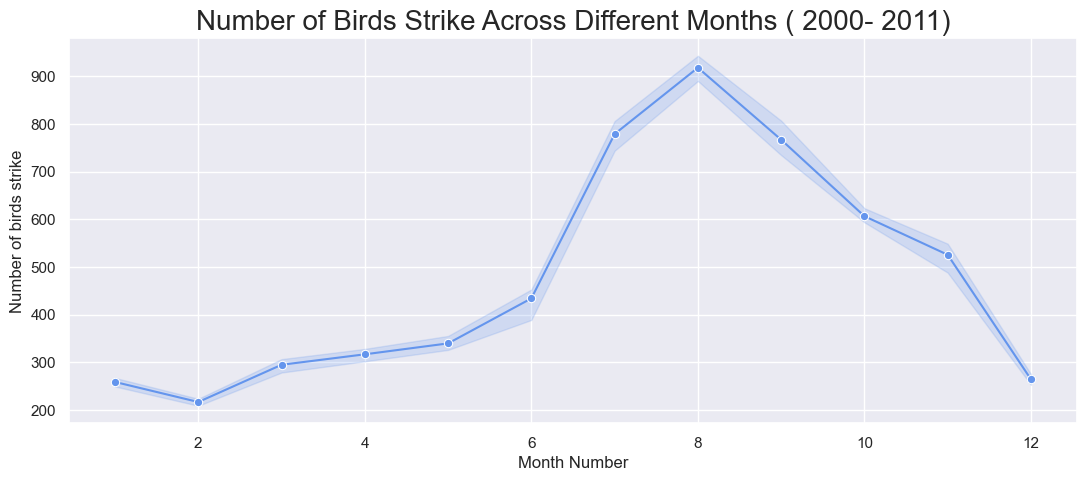

In [133]:
sns.set_theme()
plt.figure(figsize=(13,5)) 
ax=  sns.lineplot(data=monthly_data,x="month",y="Wildlife: Number Struck Actual",marker="o",ci=30,color="cornflowerblue")
plt.title("Number of Birds Strike Across Different Months ( 2000- 2011)",fontsize=20)
plt.xlabel("Month Number")
plt.ylabel("Number of birds strike")
plt.show()

Here from the above graph we can see that in month July,August,September and October having the highest number of bird strikes that we can retrieve the climatic weather conditions change in this season might be due to the weather conditions led birds to stay closer to the area of airport and aircraft controlling area or stay on to the ground ..Don't know th exact reason but these 4 months having the most strikes as compare to other months

For to see any trend change let's see the same graph for last 4 years

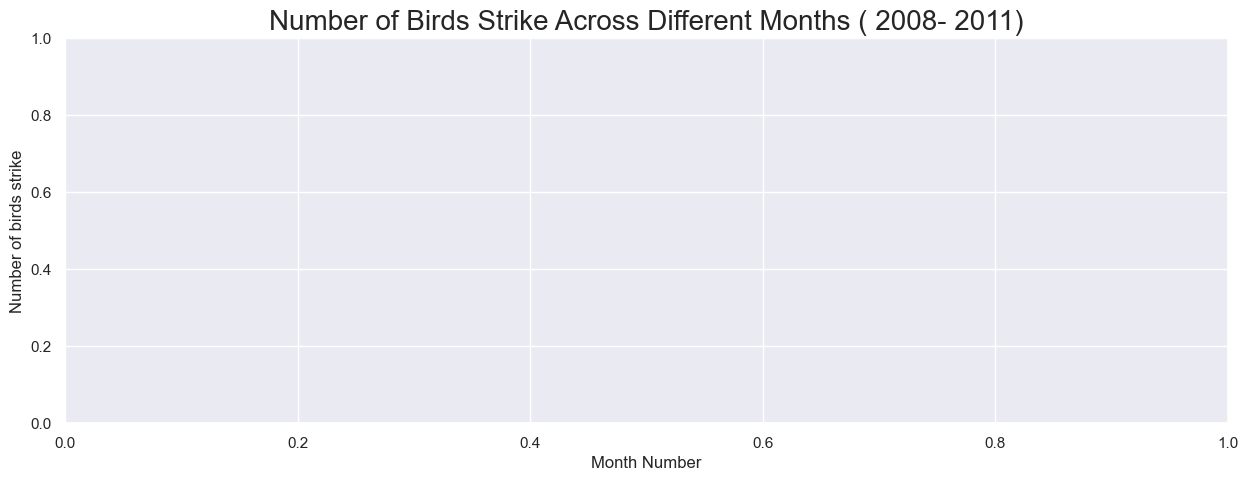

In [134]:
new_data= df_1[(df_1["FlightDate"] >= "2008") & (df_1["FlightDate"]<= "2011") ]
new_df = new_data.groupby(["month","Year"]).agg({"Wildlife: Number Struck Actual":"sum"}).sort_values(by="month")
sns.set_theme()
plt.figure(figsize=(15,5)) 
palette_n = sns.color_palette("CMRmap",n_colors=4)
sns.lineplot(data=new_df,x="month",y="Wildlife: Number Struck Actual",marker="o",ci=40,hue="Year",palette=palette_n)
plt.title("Number of Birds Strike Across Different Months ( 2008- 2011)",fontsize=20)
plt.xlabel("Month Number")
plt.ylabel("Number of birds strike")
plt.show()

From the above graph we can say that no change in this season increasing in number of birds strike as we can see the all the last four years having same increase in that particular season that we see in all the years trendline for month so July August Septemebr and October is the rising concerning months to find the root cause for increment

Heatmap of Sky Conditions impact on average Bird strike

In [135]:
pivot_table_1 = pd.pivot_table(data=df_1,index="Conditions: Sky",columns="month",values="Wildlife: Number Struck Actual",aggfunc="mean")

In [88]:
df_1.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $', 'Altitude',
       'Number of people injured', 'Is Aircraft Large?', 'Year', 'month'],
      dtype='object')

In [89]:
pivot_table_1

month,0,1,2,3,4,5,6,7,8,9,10,11,12
Conditions: Sky,,,,,,,,,,,,,
No Cloud,1.089552,3.311628,3.576705,2.324194,1.915005,1.616364,3.133470,2.912932,2.843194,2.269464,2.183065,3.578091,2.755196
Overcast,1.000000,4.247934,3.753012,3.598326,2.571895,2.487239,2.627907,2.656250,3.720703,3.060870,3.115538,4.253602,3.886447
Some Cloud,1.127660,2.467925,2.834646,3.310160,2.091388,1.559085,1.701121,2.837692,2.853809,3.213787,2.388824,2.877820,2.936102


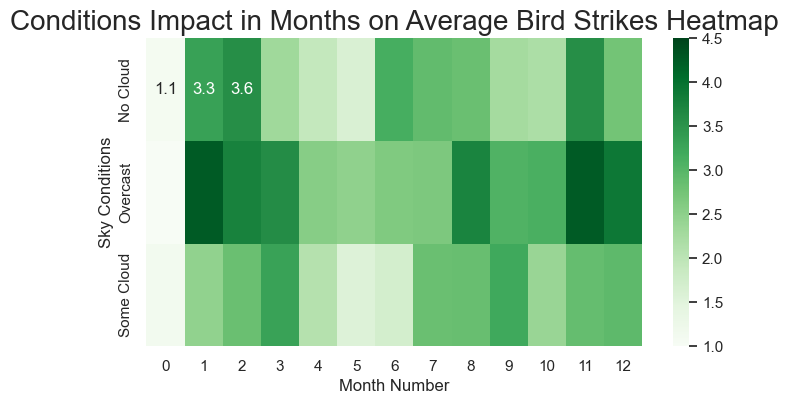

In [90]:
plt.figure(figsize=(8,4))
sns.heatmap(pivot_table_1,vmin=1,vmax=4.5,annot=True,cmap="Greens")
plt.title("Conditions Impact in Months on Average Bird Strikes Heatmap",fontsize=20)
plt.xlabel("Month Number")
plt.ylabel("Sky Conditions")
plt.show()

Above heatmap shows the average bird strikes and its relation between month and sky conditions.We can see Janaury November and december are having average bird strikes greater than 3.5 in Overcast conditions and we can also see the the higher color values in overcast sky conditions that means overcast sky conditions makes the birds strike more that makes visibility issues for pilot or other air controllers specially in winter season it makes more difficult as we see the average value is higher and we can see the vice versa impact as well in some cloud conditions in may and april it is having lower average values which means less visibility issues

Effect of Birds Strike and Impact on flight

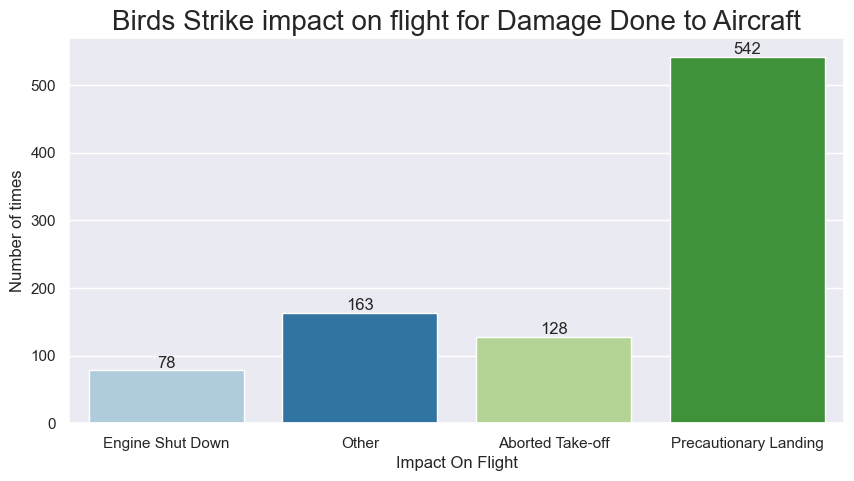

In [91]:
damage_data = df_1[df_1["Effect: Indicated Damage"] == "Caused damage"]
plt.figure(figsize=(10,5))
ax_1 = sns.countplot(data = damage_data,x= "Effect: Impact to flight",palette="Paired")
for x in ax_1.containers:
    ax_1.bar_label(x, label_type='edge')
plt.title("Birds Strike impact on flight for Damage Done to Aircraft",fontsize=20)
plt.ylabel("Number of times")
plt.xlabel("Impact On Flight")
plt.show()

From the above graph the no impact is the most number of times in aircrafts that means no action taken related to the flight and flight run as usual it runs when the bird strike incident is happened and next we see the precautionary landing is taken by the air controllers around 533 times this step is taken and this number is good or bad both because the 533 times taken landing that leads to delays in flights and the cost as well but this is also good step to ensure the safety of the passengers

In [92]:
effect_data = df_1.groupby("Effect: Indicated Damage")["Wildlife: Number Struck Actual"].count()

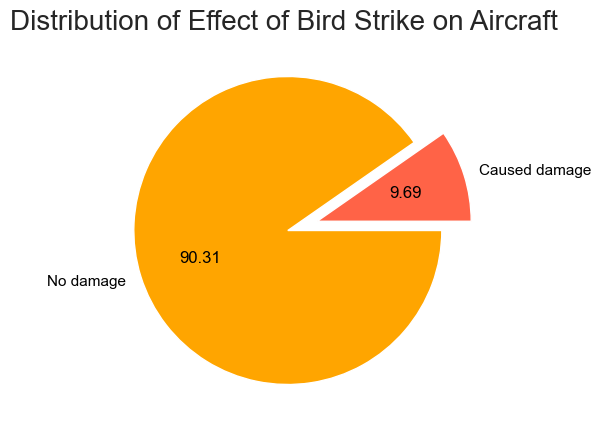

In [93]:
plt.figure(figsize=(5,5))
myexplode= [0.2,0]
plt.pie(x=effect_data,labels= effect_data.index,autopct="%.2f",colors=[
        # matplotlib named colors 
        'tomato',  'orange'],explode=myexplode,textprops={"color":"black"})
plt.title("Distribution of Effect of Bird Strike on Aircraft ",fontsize=20)
plt.show()

Effect of strike at different Altitude

In [99]:
pivot_table_2 = pd.pivot_table(data=df_1,index="Effect: Indicated Damage",columns="Altitude bin",values="Wildlife: Number Struck Actual", aggfunc="sum")

In [100]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Record ID                                25558 non-null  int64  
 1   Aircraft: Type                           25429 non-null  object 
 2   Airport: Name                            25429 non-null  object 
 3   Altitude bin                             25429 non-null  object 
 4   Aircraft: Make/Model                     25558 non-null  object 
 5   Wildlife: Number struck                  25429 non-null  object 
 6   Wildlife: Number Struck Actual           25558 non-null  int64  
 7   Effect: Impact to flight                 2078 non-null   object 
 8   FlightDate                               25429 non-null  object 
 9   Effect: Indicated Damage                 25558 non-null  object 
 10  Aircraft: Number of engines?             25291

In [101]:
df_1.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $', 'Altitude',
       'Number of people injured', 'Is Aircraft Large?', 'Year', 'month'],
      dtype='object')

In [105]:
pivot_table_2.rename(columns= { 1000: "<= 1000", 2000:"1000-2000",3000:"2000-3000",4000:"3000-4000",5000:"4000-5000",18000:"> 5000"},inplace=True)

In [106]:
pivot_table_2

Altitude bin,< 1000 ft,> 1000 ft
Effect: Indicated Damage,,
Caused damage,8803,2736
No damage,50999,6111


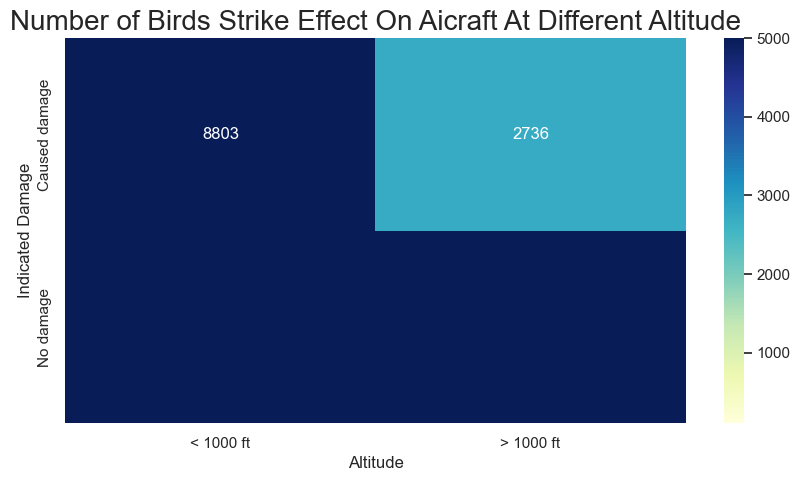

In [107]:
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table_2,annot=True,vmin=100,vmax=5000,fmt='g',cmap="YlGnBu")
plt.title("Number of Birds Strike Effect On Aicraft At Different Altitude",fontsize=20)
plt.xlabel("Altitude")
plt.ylabel("Indicated Damage")
plt.show()

From the above heatmap we can retrieve that as we see earlier more number of bird strikes occured at less altitude and now we see the damage is also done at <= 1000 altitude and by the altitude is increasing the damage on aircraft by birds strike is also also decreasing same case apply for the non damage done to aircraft by the birds strike so altitude is key factor playing in the damage as well

Pilots informed? Prior Warning and effect of strike relation

In [108]:
df_1.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $', 'Altitude',
       'Number of people injured', 'Is Aircraft Large?', 'Year', 'month'],
      dtype='object')

In [109]:
df_1["Pilot warned of birds or wildlife?"].unique()

array(['N', 'Y', nan], dtype=object)

In [110]:
df_1["Pilot warned of birds or wildlife?"] = df_1["Pilot warned of birds or wildlife?"].replace({0:"Not Informed",1:"Informed"})

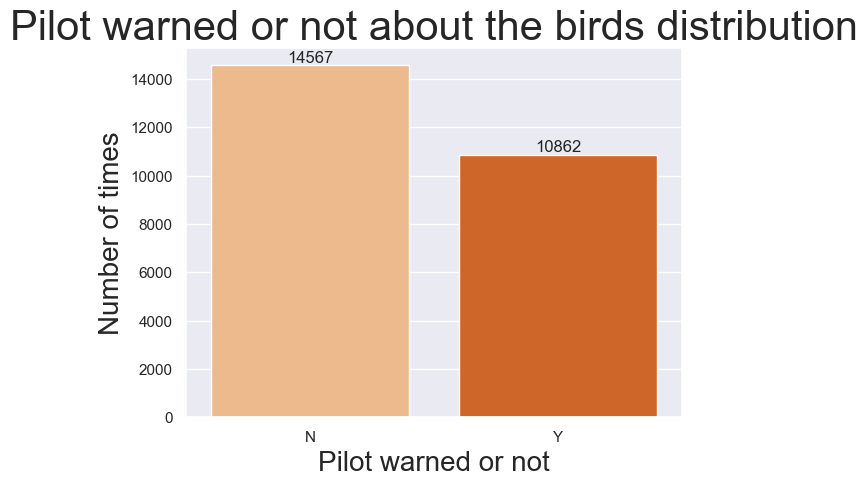

In [111]:
ax_1 = sns.countplot(data = df_1,x="Pilot warned of birds or wildlife?",palette="Oranges")
for x in ax_1.containers:
    ax_1.bar_label(x)
plt.xlabel("Pilot warned or not",fontsize=20)
plt.ylabel("Number of times",fontsize=20)
plt.title("Pilot warned or not about the birds distribution",fontsize=30)
plt.show()

From the above visuals we can retrieve that as equal distribution of warnings as many times pilot warned many times not but not informed is greater than informed because it is difficult for air controller to detect the birds in the sky as well

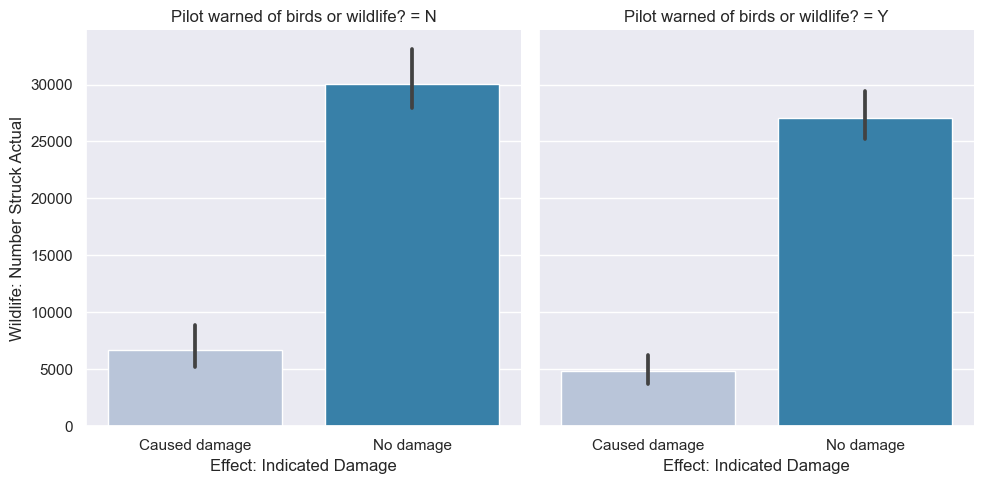

In [112]:
sns.catplot(data = df_1, x= "Effect: Indicated Damage",y="Wildlife: Number Struck Actual",col="Pilot warned of birds or wildlife?",kind="bar",
           estimator="sum",palette="PuBu",aspect=1)

plt.show()

From the above graph we can see that when the pilot are informed the birds strike impact less damage as compare to when pilot are not informed but the data above showing the all birds strike in both the informed and not informed and the distribution is nearly around same values that mean after informing the pilot the bird strike still done but the impact is not as per the when pilots are not informed and the difference between caused damage in both the cases is also not so big so pilots should be provided with more trainings how to handle if you informed by the air controllers

In [114]:
df_1["Remains of wildlife collected?"].unique()

array([False,  True])

How many times the remains of bird collected

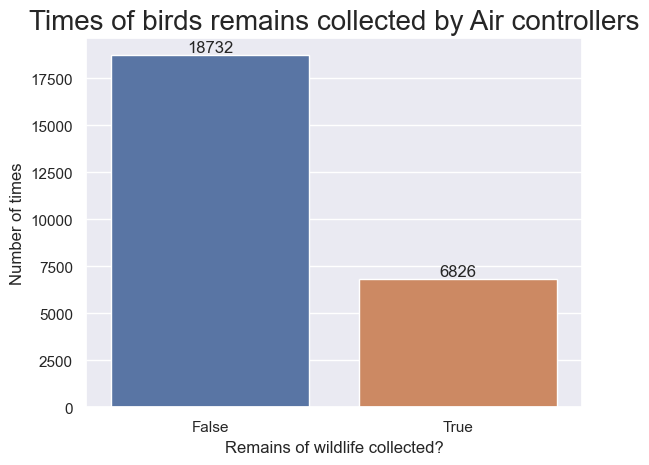

In [115]:
ax_1 =sns.countplot(data = df_1,x="Remains of wildlife collected?")
for x in ax_1.containers:
    ax_1.bar_label(x)
plt.title("Times of birds remains collected by Air controllers",fontsize=20)
plt.ylabel("Number of times")
plt.show()

From the above graph we can see that many times the remains are not collected and yes it is difficult to find that also but we should work on the techniques on how to finding out the remains and sending to Smithsonian

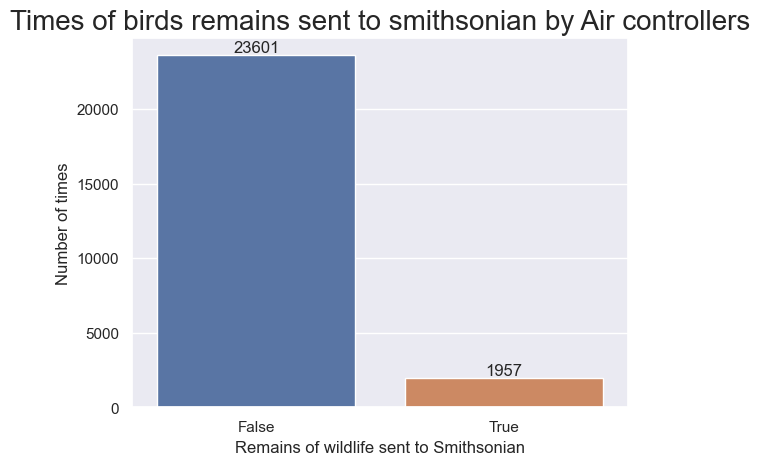

In [116]:
ax_1 =sns.countplot(data = df_1,x="Remains of wildlife sent to Smithsonian")
for x in ax_1.containers:
    ax_1.bar_label(x)
plt.title("Times of birds remains sent to smithsonian by Air controllers",fontsize=20)
plt.ylabel("Number of times")
plt.show()

Above graph shows not the good results as per from the wildlife protector around very less times the remains are sent to smithsonian and air line operators should focus on how to increase this ratio